## Marketing Campaign Conversion Values Prediction

### Obejective of this analysis

The objective of this analysis is to predict the total conversion value based on various advertising metrics. By understanding the relationship between advertising metrics and conversion value, the company can optimize their marketing strategies to maximize conversion and revenue.

### Context and Significance of the Dataset

The dataset contains information about advertising campaigns, including metrics such as impressions, click-through rate (CTR), spend, likes, shares, comments, channel, campaign, location, device and total conversion value. Total conversion value represents the monetary value generated from the advertising efforts. This dataset is significant for businesses as it provides insights into the effectiveness of different advertising channels and strategies in driving conversions and revenue.

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
df=pd.read_excel(r"C:\Users\syuan\Downloads\Conversion Values Prediction.xlsx")

In [3]:
df.head()

,Campaign,Date,City/Location,Latitude,Longitude,Channel,Device,Ad,Impressions,"CTR, %",Clicks,Daily Average CPC,"Spend, GBP",Conversions,"Total conversion value, GBP",Likes (Reactions),Shares,Comments
0,Spring,2023-03-01,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1110.8,0.0185,20.54980,1.3915,28.595047,1,51.840,45.0,4.0,3.0
1,Spring,2023-03-02,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1296.6,0.0110,14.26260,0.7245,10.333254,2,40.320,14.0,17.0,10.5
2,Spring,2023-03-03,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1264.4,0.0132,16.69008,0.3795,6.333885,4,53.760,24.0,1.0,7.5
3,Spring,2023-03-04,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,837.8,0.0159,13.32102,0.5750,7.659586,3,25.920,59.0,10.0,6.0
4,Spring,2023-03-05,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1599.0,0.0144,23.02560,0.8280,19.065197,2,108.192,44.0,17.0,1.5


In [4]:
df.describe()

,Date,Latitude,Longitude,Impressions,"CTR, %",Clicks,Daily Average CPC,"Spend, GBP",Conversions,"Total conversion value, GBP",Likes (Reactions),Shares,Comments
count,9900,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,2023-07-16 00:00:00,52.493593,-1.423660,1479.338263,0.012342,18.342022,0.903973,16.489906,4.065859,174.919236,61.463394,12.045859,7.225303
min,2023-03-01 00:00:00,51.507350,-2.244644,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-05-08 00:00:00,51.507350,-2.244644,1025.275000,0.009400,10.797730,0.471500,5.531136,2.000000,62.265000,42.000000,5.000000,3.000000
50%,2023-07-16 00:00:00,52.489471,-1.898575,1436.750000,0.012100,17.013264,0.840000,12.690632,4.000000,144.000000,60.000000,10.500000,6.000000
75%,2023-09-23 00:00:00,53.483959,-0.127760,1910.025000,0.015070,24.667050,1.232875,23.380942,6.000000,251.040000,79.200000,17.000000,10.500000
max,2023-11-30 00:00:00,53.483959,-0.127760,3847.000000,0.026400,61.571620,2.691000,109.007813,11.000000,939.600000,152.400000,58.500000,28.500000
std,NaN,0.806993,0.927214,660.540407,0.004129,10.246853,0.562639,14.471420,2.291140,139.799926,27.449340,9.234772,4.901152


In [5]:
#Check if there are nulls
df.isnull().sum()

Campaign                       0
Date                           0
City/Location                  0
Latitude                       0
Longitude                      0
Channel                        0
Device                         0
Ad                             0
Impressions                    0
CTR, %                         0
Clicks                         0
Daily Average CPC              0
Spend, GBP                     0
Conversions                    0
Total conversion value, GBP    0
Likes (Reactions)              0
Shares                         0
Comments                       0
dtype: int64

In [6]:
df=df.drop(['Latitude','Longitude','Date'],axis=1)

In [7]:
df.rename(columns={'Spend, GBP':'Spend',
                   'Total conversion value, GBP':'Total conversion value',
                   'Likes (Reactions)':'Likes',
                     'CTR, %':'CTR'},inplace=True)

<Axes: xlabel='Total conversion value', ylabel='Count'>

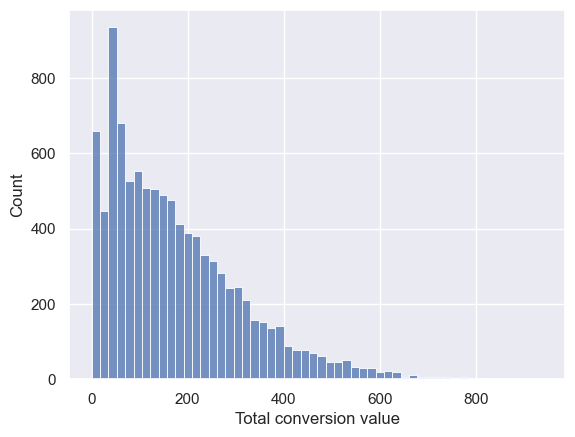

In [8]:
#Check if there are outliers
sns.histplot(df['Total conversion value'])

In [9]:
q=df['Total conversion value'].quantile(0.99)
df1=df[df['Total conversion value']<q]

<Axes: xlabel='Total conversion value', ylabel='Count'>

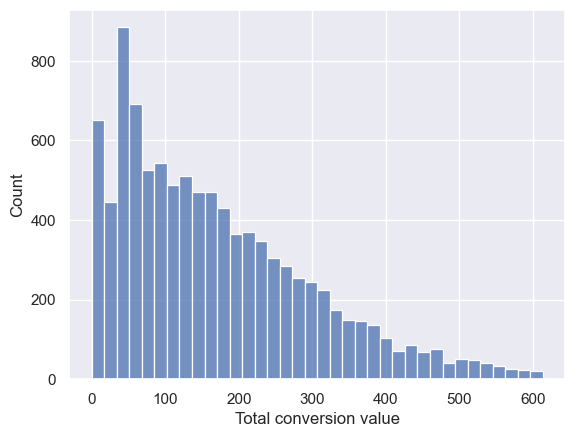

In [10]:
sns.histplot(df1['Total conversion value'])

### Exploratory Data Analysis (EDA)

<Axes: xlabel='Impressions', ylabel='Count'>

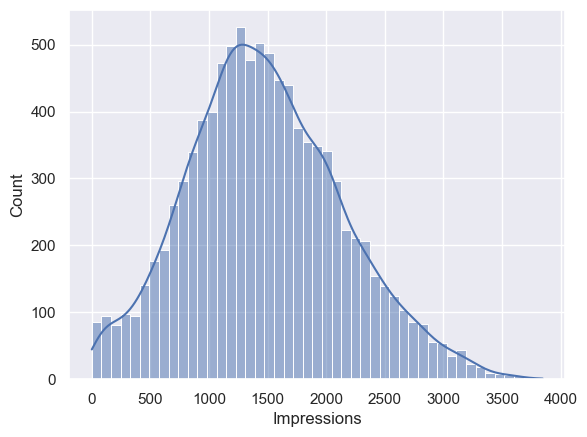

In [11]:
#Check if independent variables are normally distributed
sns.histplot(df1['Impressions'],kde=True)

<Axes: xlabel='CTR', ylabel='Count'>

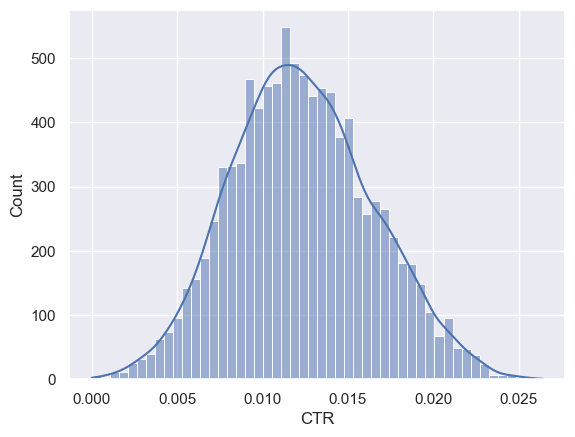

In [12]:
sns.histplot(df1['CTR'],kde=True)

<Axes: xlabel='Clicks', ylabel='Count'>

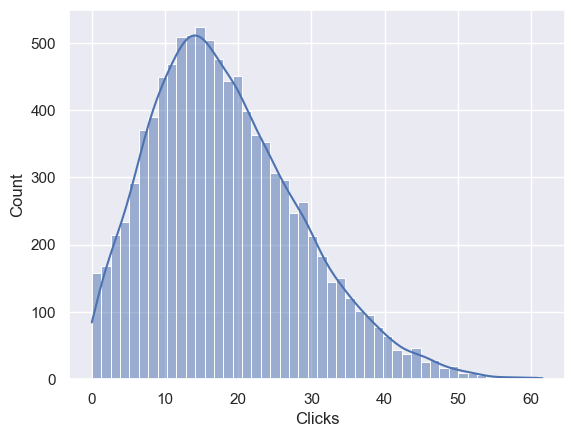

In [13]:
sns.histplot(df1['Clicks'],kde=True)

<Axes: xlabel='Clicks', ylabel='Count'>

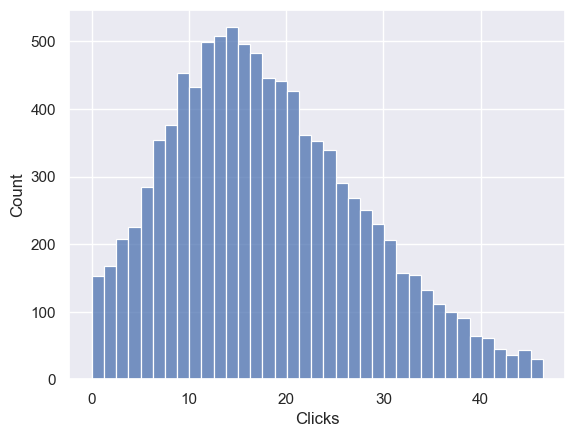

In [14]:
q1=df['Clicks'].quantile(0.99)
df1=df[df['Clicks']<q1]
sns.histplot(df1['Clicks'])

<Axes: xlabel='Daily Average CPC', ylabel='Count'>

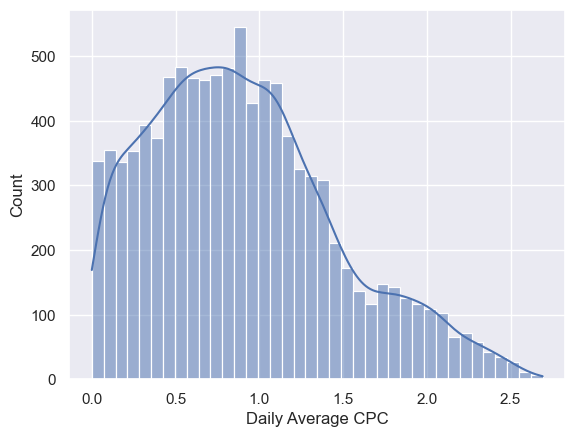

In [15]:
sns.histplot(df['Daily Average CPC'],kde=True)

<Axes: xlabel='Daily Average CPC', ylabel='Count'>

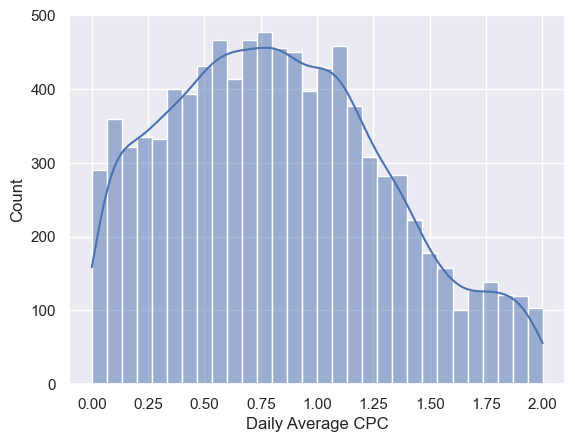

In [16]:
q2=df['Daily Average CPC'].quantile(0.95)
df1=df[df['Daily Average CPC']<q2]
sns.histplot(df1['Daily Average CPC'],kde=True)

<Axes: xlabel='Spend', ylabel='Count'>

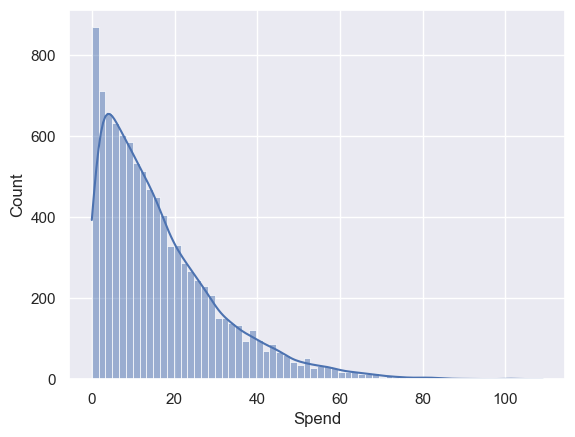

In [17]:
sns.histplot(df['Spend'],kde=True)

<Axes: xlabel='Spend', ylabel='Count'>

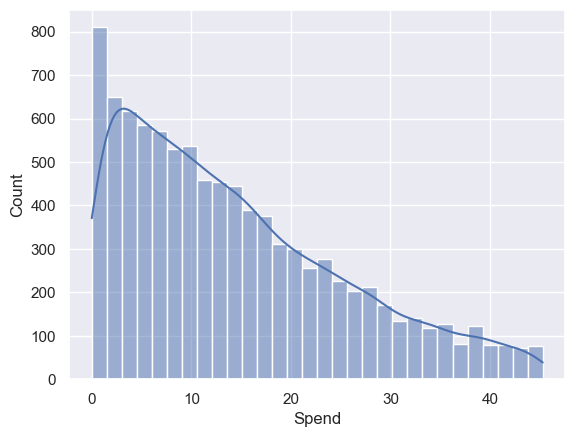

In [18]:
q3=df['Spend'].quantile(0.95)
df1=df[df['Spend']<q3]
sns.histplot(df1['Spend'],kde=True)

<Axes: xlabel='Conversions', ylabel='Count'>

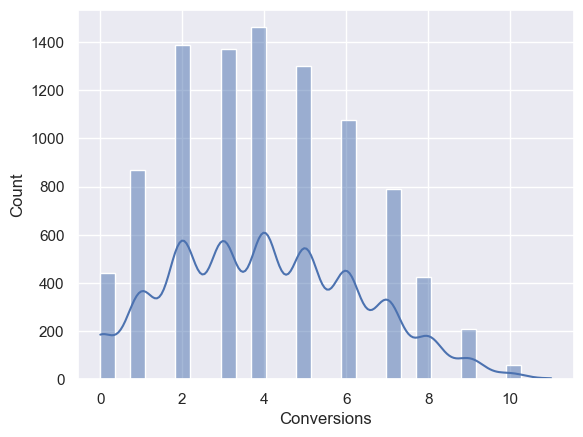

In [19]:
sns.histplot(df1['Conversions'],kde=True)

<Axes: xlabel='Conversions', ylabel='Count'>

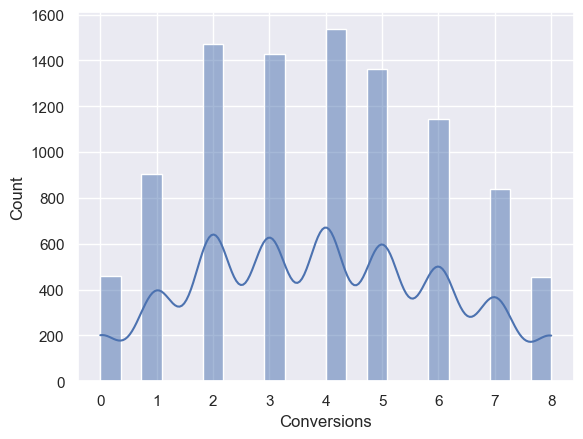

In [20]:
q4=df['Conversions'].quantile(0.99)
df1=df[df['Conversions']<q4]
sns.histplot(df1['Conversions'],kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

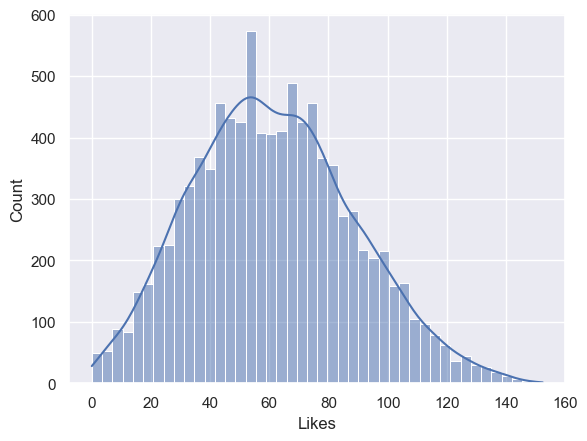

In [21]:
sns.histplot(df1['Likes'],kde=True)

<Axes: xlabel='Shares', ylabel='Count'>

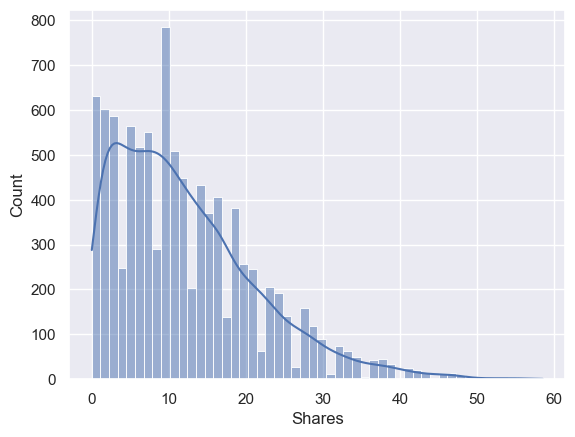

In [22]:
sns.histplot(df1['Shares'],kde=True)

<Axes: xlabel='Shares', ylabel='Count'>

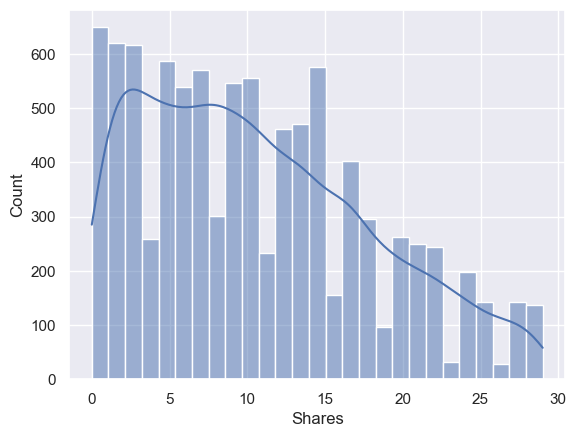

In [23]:
q5=df['Shares'].quantile(0.95)
df1=df[df['Shares']<q5]
sns.histplot(df1['Shares'],kde=True)

C:\Users\syuan\AppData\Local\Temp\ipykernel_22136\1329507592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['shares_sqrt'] = np.sqrt(df1['Shares'])


<Axes: xlabel='shares_sqrt', ylabel='Count'>

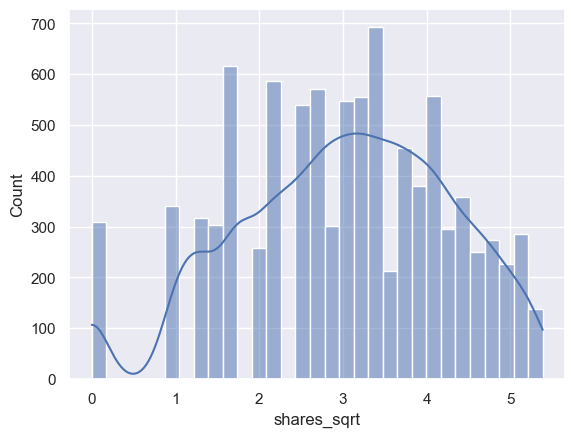

In [24]:
df1['shares_sqrt'] = np.sqrt(df1['Shares'])
sns.histplot(df1['shares_sqrt'],kde=True)

<Axes: xlabel='Comments', ylabel='Count'>

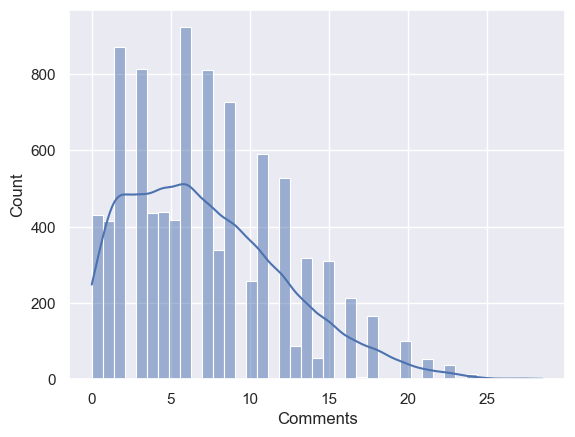

In [25]:
sns.histplot(df1['Comments'],kde=True)

<Axes: xlabel='Comments', ylabel='Count'>

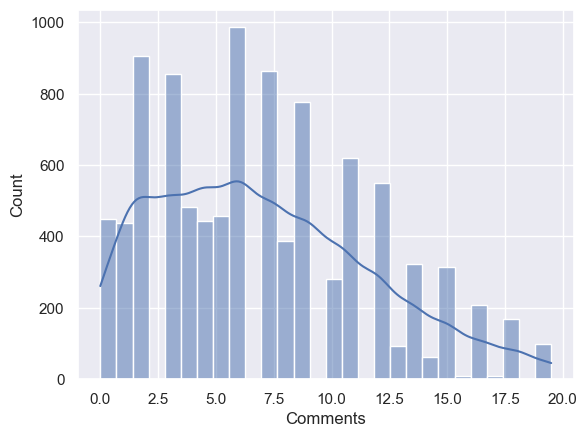

In [26]:
q6=df['Comments'].quantile(0.99)
df1=df[df['Comments']<q6]
sns.histplot(df1['Comments'],kde=True)

C:\Users\syuan\AppData\Local\Temp\ipykernel_22136\2403825837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['comments_sqrt'] = np.sqrt(df1['Comments'])


<Axes: xlabel='comments_sqrt', ylabel='Count'>

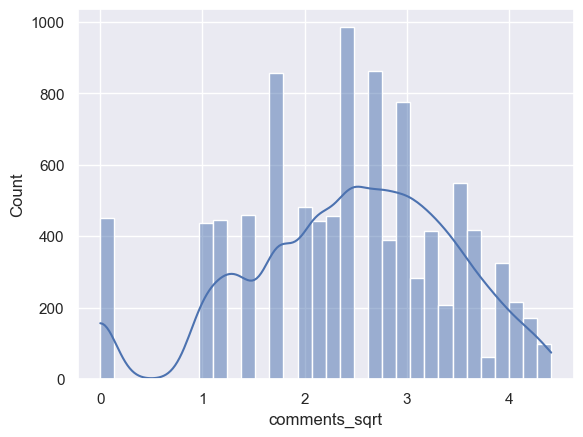

In [27]:
df1['comments_sqrt'] = np.sqrt(df1['Comments'])
sns.histplot(df1['comments_sqrt'],kde=True)

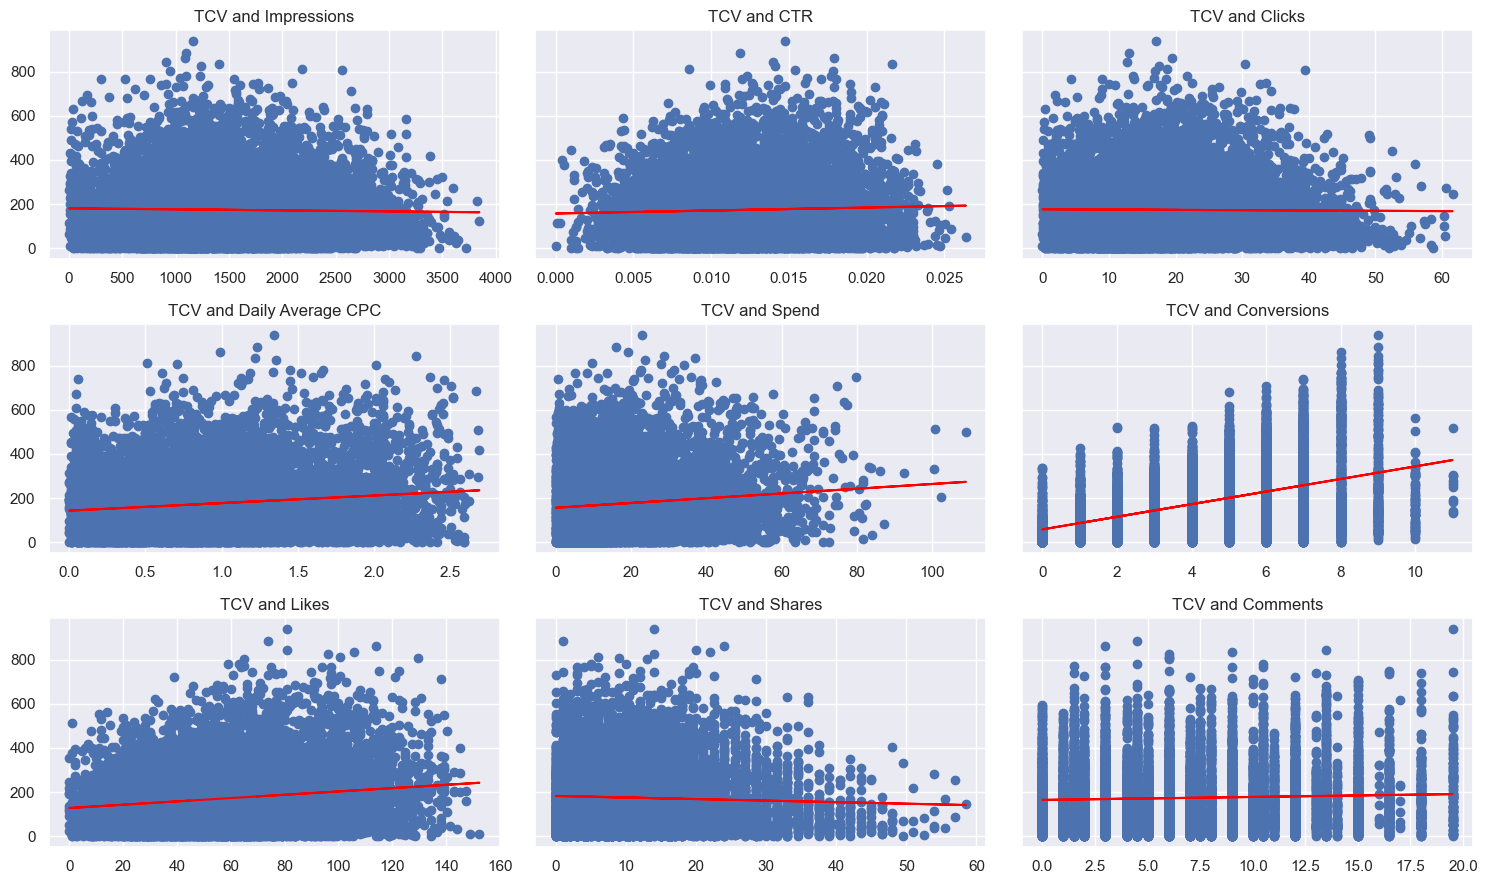

In [72]:
#Check if independent variables and dependent variables are linearly correlated

f, axes = plt.subplots(3, 3, sharey=True, figsize=(15, 9))
ax_list = axes.flatten()

# Helper function to add scatter plot and linear regression line
def add_scatter_and_line(ax, x, y, x_label, y_label):
    ax.scatter(x, y)
    ax.set_title(f'TCV and {x_label}')
    
    # Fit linear regression
    m, b = np.polyfit(x, y, 1)
    
    # Plot the linear regression line
    ax.plot(x, m*x + b, color='red')

# Scatter plots for each subplot with linear regression lines
columns = ['Impressions', 'CTR', 'Clicks', 'Daily Average CPC', 'Spend', 'Conversions', 'Likes', 'Shares', 'Comments']
for i,column in enumerate(columns):
    add_scatter_and_line(ax_list[i],df1[column],df1['Total conversion value'], column, 'Total conversion value' )
    
#add_scatter_and_line(ax_list[0], df1['Impressions'], df1['Total conversion value'], 'Impressions', 'Total conversion value')
#add_scatter_and_line(ax_list[1], df1['CTR'], df1['Total conversion value'], 'CTR', 'Total conversion value')
#add_scatter_and_line(ax_list[2], df1['Clicks'], df1['Total conversion value'], 'Clicks', 'Total conversion value')
#add_scatter_and_line(ax_list[3], df1['Daily Average CPC'], df1['Total conversion value'], 'Daily Average CPC', 'Total conversion value')
#add_scatter_and_line(ax_list[4], df1['Spend'], df1['Total conversion value'], 'Spend', 'Total conversion value')
#add_scatter_and_line(ax_list[5], df1['Conversions'], df1['Total conversion value'], 'Conversions', 'Total conversion value')
#add_scatter_and_line(ax_list[6], df1['Likes'], df1['Total conversion value'], 'Likes', 'Total conversion value')
#add_scatter_and_line(ax_list[7], df1['Shares'], df1['Total conversion value'], 'Shares', 'Total conversion value')
#add_scatter_and_line(ax_list[8], df1['Comments'], df1['Total conversion value'], 'Comments', 'Total conversion value')

plt.tight_layout()
plt.show()


The total conversion values do not have strong linear relationship with other numerical independent variables.

In [78]:
#Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df1[['Impressions','CTR','Spend','Conversions','Likes','Shares','Comments','Clicks']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [79]:
vif

,VIF,Features
0,22.127695,Impressions
1,15.343318,CTR
2,4.173490,Spend
3,4.276044,Conversions
4,7.358901,Likes
5,3.259382,Shares
6,3.885369,Comments
7,30.605192,Clicks


In [80]:
#Drop the feature with the highest vif
data_no_multicollinearity=df1.drop(['Clicks'],axis=1)

In [81]:
variables = df1[['Impressions','CTR','Spend','Conversions','Likes','Shares','Comments']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [82]:
vif

,VIF,Features
0,6.645888,Impressions
1,8.390162,CTR
2,3.370586,Spend
3,4.051120,Conversions
4,5.565734,Likes
5,3.234083,Shares
6,3.884668,Comments


In [33]:
data_no_multicollinearity.columns

Index(['Campaign', 'City/Location', 'Channel', 'Device', 'Ad', 'Impressions',
       'CTR', 'Spend', 'Conversions', 'Total conversion value', 'Likes',
       'Shares', 'Comments', 'comments_sqrt'],
      dtype='object')

In [34]:
#Encoding categorical variables
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [35]:
data_with_dummies.head()

,Impressions,CTR,Spend,Conversions,Total conversion value,Likes,Shares,Comments,comments_sqrt,Campaign_Spring,Campaign_Summer,City/Location_London,City/Location_Manchester,Channel_Instagram,Channel_Pinterest,Device_Mobile,Ad_Discount
0,1110.8,0.0185,28.595047,1,51.840,45.0,4.0,3.0,1.732051,True,False,False,False,False,False,False,False
1,1296.6,0.0110,10.333254,2,40.320,14.0,17.0,10.5,3.240370,True,False,False,False,False,False,False,False
2,1264.4,0.0132,6.333885,4,53.760,24.0,1.0,7.5,2.738613,True,False,False,False,False,False,False,False
3,837.8,0.0159,7.659586,3,25.920,59.0,10.0,6.0,2.449490,True,False,False,False,False,False,False,False
4,1599.0,0.0144,19.065197,2,108.192,44.0,17.0,1.5,1.224745,True,False,False,False,False,False,False,False


In [36]:
print(data_with_dummies.columns)

Index(['Impressions', 'CTR', 'Spend', 'Conversions', 'Total conversion value',
       'Likes', 'Shares', 'Comments', 'comments_sqrt', 'Campaign_Spring ',
       'Campaign_Summer ', 'City/Location_London', 'City/Location_Manchester',
       'Channel_Instagram', 'Channel_Pinterest', 'Device_Mobile',
       'Ad_Discount'],
      dtype='object')


In [37]:
cols=['Total conversion value',
      'Impressions','CTR','Spend',
      'Conversions','Likes','Shares',
      'Comments','City/Location_London',
      'Campaign_Spring ','Campaign_Summer ',
      'City/Location_Manchester','Channel_Instagram',
      'Channel_Pinterest','Device_Mobile','Ad_Discount']

In [38]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Total conversion value,Impressions,CTR,Spend,Conversions,Likes,Shares,Comments,City/Location_London,Campaign_Spring,Campaign_Summer,City/Location_Manchester,Channel_Instagram,Channel_Pinterest,Device_Mobile,Ad_Discount
0,51.840,1110.8,0.0185,28.595047,1,45.0,4.0,3.0,False,True,False,False,False,False,False,False
1,40.320,1296.6,0.0110,10.333254,2,14.0,17.0,10.5,False,True,False,False,False,False,False,False
2,53.760,1264.4,0.0132,6.333885,4,24.0,1.0,7.5,False,True,False,False,False,False,False,False
3,25.920,837.8,0.0159,7.659586,3,59.0,10.0,6.0,False,True,False,False,False,False,False,False
4,108.192,1599.0,0.0144,19.065197,2,44.0,17.0,1.5,False,True,False,False,False,False,False,False


### Model Development and Evaluation

#### Linear Regression Model

In [39]:
# Dependent variable is 'Total conversion value'
targets = data_preprocessed['Total conversion value']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['Total conversion value'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [41]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
r_squared = reg.score(x_train, y_train)
r_squared

0.4163703612168852

In [44]:
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.41524972058942156


As independent variable and dependent variable are only slightly correlated , it turns out that linear regression model can hardly predict conversion values with other independent variables.

In [45]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Impressions,-0.015448
1,CTR,-724.487296
2,Spend,0.691176
3,Conversions,26.129738
4,Likes,0.515465
5,Shares,0.982536
6,Comments,0.275979
7,City/Location_London,-12.226576
8,Campaign_Spring,-50.088199
9,Campaign_Summer,-64.808333


The analysis identified key advertising metrics that significantly influence total conversion values, including conversions,locations,campaign season, channel device and if the ad contains information about discounts. These features play a crucial role in predicting conversion value and guiding marketing strategies.

In [46]:
# Dependent variable is 'Total conversion value'
targets = data_preprocessed['Total conversion value']

# According to the coefficients of independent variables,drop those variables with little correlation 
inputs_2 = data_preprocessed.drop(['Total conversion value','CTR','Comments','Impressions','Likes','Spend',
                                   'Shares','City/Location_London','City/Location_Manchester'],axis=1)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(inputs_2, targets, test_size=0.2, random_state=42)

In [48]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [50]:
r_squared = reg.score(x_train, y_train)
r_squared

0.39313586309860327

In [51]:
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.392592634331556


The adjusted R-squared suggests that approximately 39.26% of the variance in the dependent variable can be explained by the independent variables in the linear regression model.Let's try other models.

#### Decision Trees and Random Forest model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [53]:
x_train, x_test, y_train, y_test = train_test_split(inputs_2, targets, test_size=0.2, random_state=42)

In [54]:
# Create decision tree regressor object
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the decision tree model to the training data
dt_regressor.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500]
}

# Instantiate the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the optimal number of trees
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameter
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Optimal number of estimators: {best_n_estimators}")


Optimal number of estimators: 400


In [56]:
# Create random forest regressor object
rf_regressor = RandomForestRegressor(n_estimators=400, random_state=42)

# Fit the random forest model to the training data
rf_regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=400, random_state=42)

In [57]:
# Predictions using decision tree model
dt_predictions = dt_regressor.predict(x_test)

# Predictions using random forest model
rf_predictions = rf_regressor.predict(x_test)


In [58]:
# Evaluate decision tree model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree - Mean Squared Error:", dt_mse)
print("Decision Tree - R-squared:", dt_r2)

# Evaluate random forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)


Decision Tree - Mean Squared Error: 7291.760018871504
Decision Tree - R-squared: 0.6243676024272833
Random Forest - Mean Squared Error: 7287.7600410699015
Random Forest - R-squared: 0.6245736598466122


#### XGBoost Model

In [65]:
from xgboost import XGBRegressor
# Split data
X_train, X_test, y_train, y_test = train_test_split(inputs_2, targets, test_size=0.2, random_state=42)

# Train the model
xgb_regressor = XGBRegressor(n_estimators=100,learning_rate= 0.1, max_depth= 5,colsample_bytree= 0.8, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - Mean Squared Error: {mse}")
print(f"XGBoost - R-squared: {r2}")


XGBoost - Mean Squared Error: 7102.7763278057455
XGBoost - R-squared: 0.634103029374063


In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [67]:
df_p=pd.DataFrame(y_test)
df_p['Prediction']=y_pred
df_p.describe()

,Total conversion value,Prediction
count,1958.000000,1958.000000
mean,175.099181,172.621399
std,139.362392,108.593948
min,0.000000,4.800931
25%,63.276000,101.276096
50%,141.060000,140.987061
75%,250.800000,216.867981
max,841.200000,639.084900


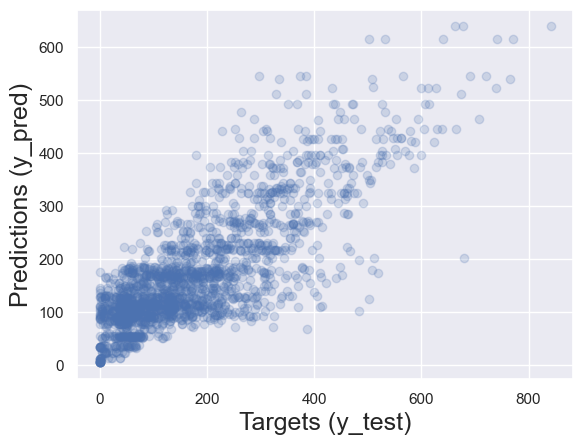

In [68]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)

plt.show()

In [69]:
from scipy.stats import pearsonr

correlation, _ = pearsonr(y_test, y_pred)
print(f"Pearson correlation coefficient: {correlation}")


Pearson correlation coefficient: 0.7966961335090916


C:\Users\syuan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Residuals PDF')

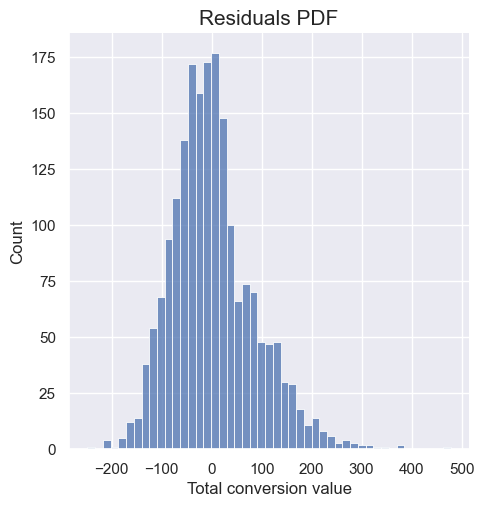

In [70]:
sns.displot(y_test - y_pred)
plt.title("Residuals PDF", size=15)

The XGBoost model, with an R-squared of 0.6341 and a Pearson correlation coefficient of 0.7967, demonstrates decent predictive capabilities and a good fit to the data.
These metrics suggest that the XGBoost model is effective at capturing the underlying relationships in the dataset, leading to accurate predictions.

### Recommendations

#### 1)Resource Allocation

Ad on Instagram and Pinterest and ad containing information about discounts are most positively correlated with total conversion values.Therefore, by allocating more resources to campaigns on Instagram and Pinterest and to campaigns that offer discounts, the company can maximize conversion rates and revenue.

#### 2)Performance Monitoring

The developed predictive model can be used for ongoing performance monitoring and evaluation of advertising campaigns. By continuously monitoring key metrics and comparing them against predicted conversion values, the company can identify underperforming campaigns and make timely adjustments to improve outcomes.

### Potential Next Steps

#### 1)Refinement of Models

Further refinement of predictive models, such as fine-tuning hyperparameters or exploring advanced modeling techniques, could potentially improve predictive accuracy and robustness.

#### 2)Data Collection and Quality

Ensuring the collection of high-quality data and expanding the dataset with additional relevant variables could enhance the model's predictive capabilities and generalizability.